In [182]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/goodreadsbooks/books.csv


In [183]:
try:
    data = pd.read_csv("/kaggle/input/goodreadsbooks/books.csv", on_bad_lines='skip')
except pd.errors.ParserError:
    pass
data

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...,...,...,...
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco


In [184]:
original_df = data
print("Original data shape :", original_df.shape)

Original data shape : (11123, 12)


In [185]:
# Total number of records in original dataframe
print("Total number of records in original dataframe :", len(data))

Total number of records in original dataframe : 11123


In [186]:
# All Columns 
list(data.columns)

['bookID',
 'title',
 'authors',
 'average_rating',
 'isbn',
 'isbn13',
 'language_code',
 '  num_pages',
 'ratings_count',
 'text_reviews_count',
 'publication_date',
 'publisher']

In [187]:
# Replace spaces with nothing 
data.columns = data.columns.str.replace(' ', '')
data.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

****Data Overview and Basic Statistics:****

In [188]:

# What is the total number of books in the dataset?
len(data)

11123

In [189]:
# How many unique authors are there?
len(data["authors"].unique())

6639

In [190]:

# What is the average book rating in the dataset?
data["average_rating"].mean()


3.9340753393868564

In [191]:

# What is the range of publication dates in the dataset?
date_formats = '%m/%d/%Y'  #12/1/1988
data['publication_date'] = pd.to_datetime(data['publication_date'], format=date_formats, errors='coerce') 
print("Earliest date of publication :",data['publication_date'].min().date())
print("Latest date of publication ",data['publication_date'].max().date())


Earliest date of publication : 1900-01-01
Latest date of publication  2020-03-31


In [192]:
# Which book has the highest average rating?
data[data["average_rating"] == data["average_rating"].max()]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
624,2034,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...,Aristophanes/F.W. Hall/W.M. Geldart,5.0,0198145047,9780198145042,grc,364,0,0,1922-02-22,Oxford University Press USA
786,2560,Willem de Kooning: Late Paintings,Julie Sylvester/David Sylvester,5.0,382960226X,9783829602266,eng,83,1,0,2006-09-01,Schirmer Mosel
855,2843,Literature Circle Guide: Bridge to Terabithia:...,Tara MacCarthy,5.0,0439271711,9780439271714,eng,32,4,1,2002-01-01,Teaching Resources
1243,4287,Middlesex Borough (Images of America: New Jersey),Middlesex Borough Heritage Committee,5.0,0738511676,9780738511672,eng,128,2,0,2003-03-17,Arcadia Publishing
4125,14741,Zone of the Enders: The 2nd Runner Official St...,Tim Bogenn,5.0,0744002354,9780744002355,eng,128,2,0,2003-03-06,BradyGames
4788,17224,The Diamond Color Meditation: Color Pathway to...,John Diamond,5.0,1890995525,9781890995522,eng,74,5,3,2006-02-01,Square One Publishers
4933,17830,Bulgakov's the Master and Margarita: The Text ...,Elena N. Mahlow,5.0,0533017424,9780533017423,eng,202,4,0,1975-01-01,Vantage Press
5023,18184,The Complete Theory Fun Factory: Music Theory ...,Ian Martin/Katie Elliott,5.0,0851621813,9780851621814,eng,96,1,0,2004-06-01,Boosey & Hawkes Inc
5474,19786,The Goon Show Volume 4: My Knees Have Fallen ...,NOT A BOOK,5.0,0563388692,9780563388692,eng,2,3,0,1996-04-01,BBC Physical Audio
5476,19788,The Goon Show Volume 11: He's Fallen in the W...,NOT A BOOK,5.0,0563388323,9780563388326,eng,2,2,0,1995-10-02,BBC Physical Audio


In [193]:
# What is the most common language in which books are written?
data["language_code"].value_counts().reset_index().head()

,language_code,count
0,eng,8908
1,en-US,1408
2,spa,218
3,en-GB,214
4,fre,144


In [194]:
# How many books have more than 1000 pages?
len(data[data["num_pages"] > 1000])

217

In [195]:
# What is the average number of text reviews per book?

print(data["text_reviews_count"].mean())

542.048098534568


In [196]:

# What is the median number of pages for books published by each publisher?
data.head()
data.groupby("publisher")["num_pages"].median().reset_index()

,publisher,num_pages
0,10/18,364.0
1,1st Book Library,600.0
2,1st World Library,387.0
3,A & C Black (Childrens books),62.0
4,A Harvest Book/Harcourt Inc.,216.0
...,...,...
2285,聯經出版事業股份有限公司,537.5
2286,英文漢聲出版股份有限公司,36.0
2287,角川書店 (Kadokawa Shoten),171.5
2288,講談社,186.5


In [197]:

# How many books have both ISBN and ISBN13 values?
print("Total Books :", len(data))
print("Total number of books with ISBN and ISBN13 values :",len(data[(data["isbn"].notnull()) & (data["isbn13"].notnull())]))

Total Books : 11123
Total number of books with ISBN and ISBN13 values : 11123


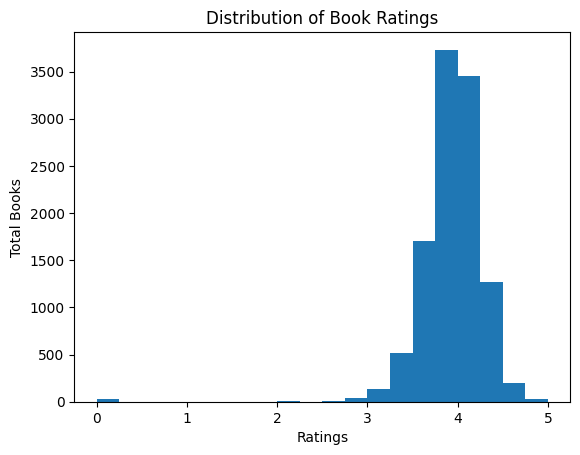

In [198]:

# What is the distribution of average ratings using a histogram?
import matplotlib.pyplot as plt

# Create a histogram with 20 bins
plt.hist(data["average_rating"], bins=20)

# Set the x-axis and y-axis labels
plt.xlabel("Ratings")
plt.ylabel("Total Books")

# Add a title to the plot
plt.title("Distribution of Book Ratings")

# Show the plot
plt.show()


In [199]:
filtered_data = data[(data["average_rating"] >= 0) & (data["average_rating"] <= 1)]
print("Total books which have ratings in between 0 and 1 :",len(filtered_data))

Total books which have ratings in between 0 and 1 : 27


****Author Analysis:****

In [200]:
#  Expanding the dataframes with single author in author column

data['authors'] = data['authors'].str.split('/')
data = data.explode('authors')
print("Total number of records in new dataframe :",len(data))

Total number of records in new dataframe : 19237


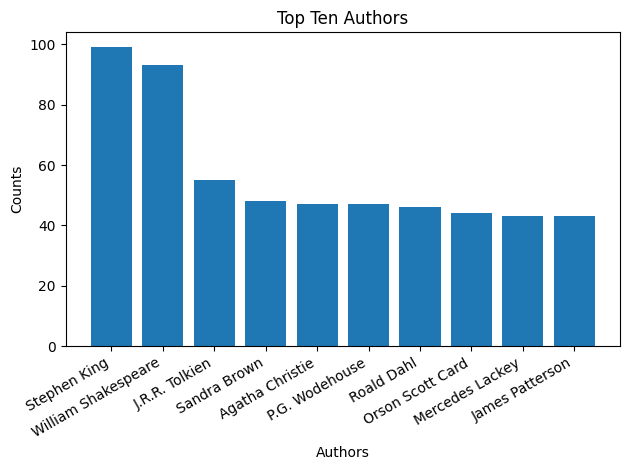

In [201]:
# Who are the top 10 authors with the most books in the dataset?


import matplotlib.pyplot as plt

top_ten_authors = data["authors"].value_counts().head(10)
plt.bar(top_ten_authors.index, top_ten_authors.values)

plt.xlabel('Authors')
plt.ylabel('Counts')
plt.title('Top Ten Authors')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=30, ha='right')

plt.tight_layout()  # Adjusts the layout to prevent label cutoff
plt.show()



In [202]:
# Changing dataframe for Authors analysis

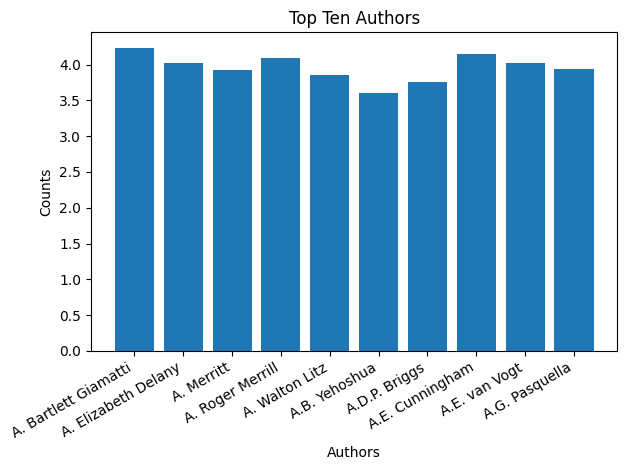

In [203]:


# Calculate the average rating for books written by each author



average_ratings = data.groupby("authors")["average_rating"].mean().reset_index().head(10)
plt.bar(average_ratings["authors"], average_ratings["average_rating"])

plt.xlabel('Authors')
plt.ylabel('Counts')
plt.title('Top Ten Authors')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=30, ha='right')

plt.tight_layout()  # Adjusts the layout to prevent label cutoff
plt.show()


In [204]:
# What is the most common language for books written by each author?
# from tqdm import tqdm
# all_authors = sorted(list(data["authors"].unique()))

# updated_data = pd.DataFrame()
# for author in tqdm(all_authors):
#     author_data = data[data["authors"] == author]
#     lang_data = author_data["language_code"].value_counts().reset_index()
#     lang_data["author"] = author
#     lang_data = lang_data[["author","language_code","count"]]
#     updated_data = pd.concat([updated_data, lang_data], ignore_index=True)
    
    
# df = pd.DataFrame(updated_data)
# df



In [205]:

# Are there any authors who write books in multiple languages?

author_language_counts = data.groupby('authors')['language_code'].nunique()

# Filter for authors with more than one unique language code
authors_with_multiple_languages = author_language_counts[author_language_counts > 1].index

print(authors_with_multiple_languages)

Index(['Adam Gopnik', 'Aeschylus', 'Agatha Christie', 'Al Franken', 'Al Ries',
       'Alain de Botton', 'Alan  Lee', 'Alan Dean Foster', 'Alan R. Clarke',
       'Albert Camus',
       ...
       'Yayoi Ogawa', 'Yoshitaka Amano', 'Yuki Shimizu', 'Yukito Kishiro',
       'Yumi Hotta', 'Zadie Smith', 'Zora Neale Hurston', 'Åsne Seierstad',
       'Émile Zola', '大暮 維人'],
      dtype='object', name='authors', length=1075)


****Publication Analysis****

In [206]:
data = original_df
data.dtypes

bookID                         int64
title                         object
authors                       object
average_rating               float64
isbn                          object
isbn13                         int64
language_code                 object
num_pages                      int64
ratings_count                  int64
text_reviews_count             int64
publication_date      datetime64[ns]
publisher                     object
dtype: object

In [207]:
data.shape

(11123, 12)

In [208]:
# Which publisher has the most books in the dataset?

data["publisher"].value_counts().reset_index().head(5)

,publisher,count
0,Vintage,318
1,Penguin Books,261
2,Penguin Classics,184
3,Mariner Books,150
4,Ballantine Books,144


In [209]:
# What is the average rating for books published by each publisher?
data.groupby("publisher")["average_rating"].mean().reset_index().head(10)

,publisher,average_rating
0,10/18,3.650
1,1st Book Library,3.580
2,1st World Library,4.180
3,A & C Black (Childrens books),4.400
4,A Harvest Book/Harcourt Inc.,4.070
5,A K PETERS,4.500
6,AA World Services,4.450
7,ACE,3.560
8,ADV Manga,4.038
9,AHA! Process,3.900


In [210]:
# Adding year published column


# Assuming "data" is your DataFrame
data["year_published"] = data["publication_date"].dt.year


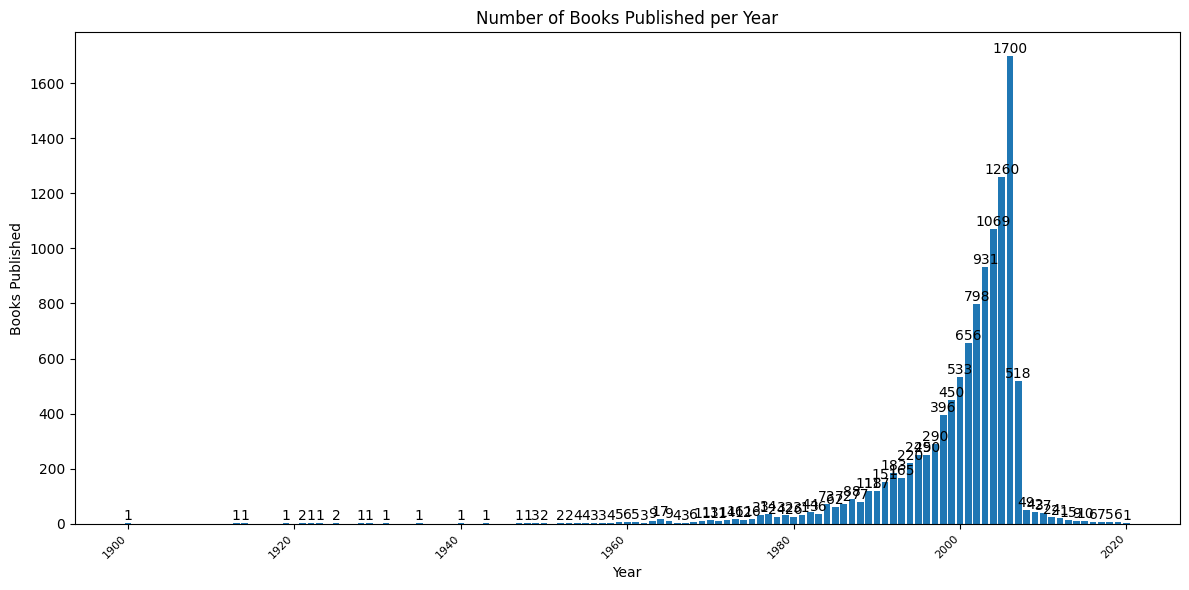

In [211]:
import matplotlib.pyplot as plt

# Assuming data["year_published"] contains the years you want to count
year_counts = data["year_published"].value_counts().sort_index()

plt.figure(figsize=(12, 6))  # Adjust the figure size

bar_plot = plt.bar(year_counts.index, year_counts.values)

plt.xlabel('Year')
plt.ylabel('Books Published')
plt.title('Number of Books Published per Year')

# Rotate the x-axis labels for better readability and adjust font size
plt.xticks(rotation=45, ha='right', fontsize=8)

# Add labels to the bars for clarity
for x, y in zip(year_counts.index, year_counts.values):
    plt.text(x, y, f'{int(y)}', ha='center', va='bottom')

plt.tight_layout()  # Adjusts the layout to prevent label cutoff
plt.show()


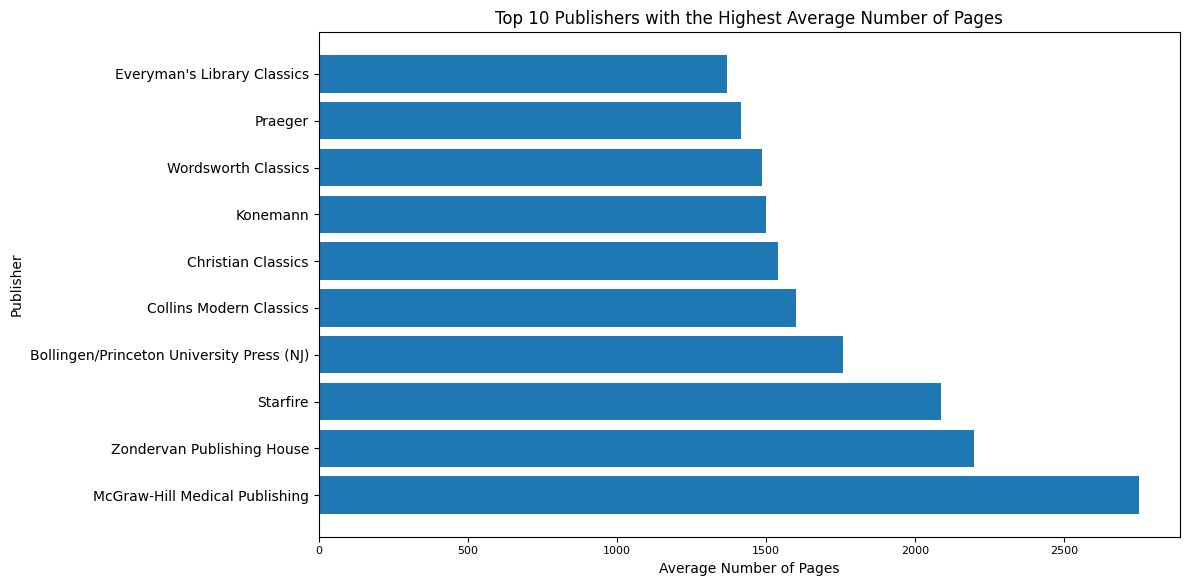

In [212]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# Assuming data["num_pages"] contains the number of pages and data["publisher"] contains the publisher information
publisher_page_counts = data.groupby("publisher")["num_pages"].mean().reset_index()
top_10_publishers = publisher_page_counts.sort_values(by="num_pages", ascending=False).head(10)

plt.figure(figsize=(12, 6))  # Adjust the figure size

# Create a horizontal bar plot by using plt.barh
bar_plot = plt.barh(top_10_publishers["publisher"], top_10_publishers["num_pages"])

plt.xlabel('Average Number of Pages')  # Set the x-axis label to 'Average Number of Pages'
plt.ylabel('Publisher')  # Set the y-axis label to 'Publisher'
plt.title('Top 10 Publishers with the Highest Average Number of Pages')

# Adjust the layout to prevent label cutoff
plt.tight_layout()

# Resolve the font warning
font_prop = FontProperties(family="DejaVu Sans", style="normal", size=8)
plt.xticks(fontproperties=font_prop)

plt.show()


In [213]:
data[data["publisher"] == "McGraw-Hill Medical Publishing"]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year_published
7862,30258,Harrison's Principles of Internal Medicine,"[Dennis L. Kasper, Dan L. Longo, Stephen L. Ha...",4.35,0071391401,9780071391405,eng,2751,23,4,2004-07-27,McGraw-Hill Medical Publishing,2004.0


In [214]:
data.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year_published
0,1,Harry Potter and the Half-Blood Prince (Harry ...,"[J.K. Rowling, Mary GrandPré]",4.57,0439785960,9780439785969,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,2006.0
1,2,Harry Potter and the Order of the Phoenix (Har...,"[J.K. Rowling, Mary GrandPré]",4.49,0439358078,9780439358071,eng,870,2153167,29221,2004-09-01,Scholastic Inc.,2004.0
2,4,Harry Potter and the Chamber of Secrets (Harry...,[J.K. Rowling],4.42,0439554896,9780439554893,eng,352,6333,244,2003-11-01,Scholastic,2003.0
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,"[J.K. Rowling, Mary GrandPré]",4.56,043965548X,9780439655484,eng,435,2339585,36325,2004-05-01,Scholastic Inc.,2004.0
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,"[J.K. Rowling, Mary GrandPré]",4.78,0439682584,9780439682589,eng,2690,41428,164,2004-09-13,Scholastic,2004.0


In [215]:
import pandas as pd

# Assuming you have a DataFrame called 'Books' with columns 'Title', 'Author', and other columns

# Group by 'Title' and aggregate other columns as lists
aggregated_data = data.groupby('title').agg(lambda x: list(x) if x.name != 'title' else x).reset_index()
aggregated_data.head()



,title,bookID,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year_published
0,said the shotgun to the head.,[6549],[[Saul Williams]],[4.22],[0743470796],[9780743470797],[en-US],[192],[2762],[214],[2003-09-01 00:00:00],[MTV Books],[2003.0]
1,$30 Film School: How to Write Direct Produce...,[14490],[[Michael W. Dean]],[3.49],[1592000673],[9781592000678],[eng],[528],[30],[4],[2003-05-13 00:00:00],[Cengage Learning],[2003.0]
2,'Salem's Lot,"[5413, 5414, 5415, 5419, 5420, 19135, 19137, 3...","[[Stephen King, Jerry N. Uelsmann], [Stephen K...","[4.25, 4.02, 4.02, 4.02, 4.02, 4.02, 4.02, 4.02]","[0385516487, 0743536967, 0965772411, 045109231...","[9780385516488, 9780743536967, 9780965772419, ...","[eng, eng, eng, en-US, eng, en-US, eng, eng]","[594, 17, 405, 427, 586, 0, 817, 427]","[84123, 227, 1039, 178, 25, 56, 18, 186]","[571, 54, 130, 35, 6, 5, 3, 22]","[2005-11-01 00:00:00, 2004-01-19 00:00:00, 197...","[Doubleday, Simon & Schuster Audio, Doubleday,...","[2005.0, 2004.0, 1975.0, 1979.0, 2010.0, 2004...."
3,1 000 Places to See Before You Die,[11525],[[Patricia Schultz]],[3.85],[0761104844],[9780761104841],[eng],[992],[36303],[439],[2003-05-22 00:00:00],[Workman Publishing Company],[2003.0]
4,10 lb Penalty,[8542],[[Dick Francis]],[3.9],[042519745X],[9780425197455],[eng],[320],[3490],[177],[2004-08-03 00:00:00],[G.P. Putnam's Sons],[2004.0]


****Time Series Analysis:****

In [216]:
# Is there a seasonal pattern in book publication over the years?




In [217]:
# Are there any trends in average ratings over time?





In [218]:
# What is the distribution of books by month of publication?


In [219]:

# How has the number of text reviews changed over the years?

**Correlations and Relationships:**

In [220]:
# Is there a correlation between the number of ratings and the average rating?
data.head()
data["ratings_count"].corr(data["average_rating"])

0.038223591811010385

In [221]:
# Do books with more pages tend to have higher average ratings?
data["num_pages"].corr(data["average_rating"])

0.1504766130750082

In [222]:

# Are books in a certain language more likely to have a high average rating?
data.head()

all_languages = data["language_code"].unique()

for lang in all_languages:
    new_data = data[data["language_code"] == lang]
    print(f"{lang} :", new_data["average_rating"].mean())

eng : 3.934061517736866
en-US : 3.914659090909091
fre : 3.9715277777777778
spa : 3.9293119266055054
en-GB : 3.923411214953272
mul : 4.126315789473685
grc : 3.7072727272727275
enm : 3.8733333333333335
en-CA : 4.025714285714286
ger : 3.9501010101010094
jpn : 4.268695652173913
ara : 3.55
nl : 4.18
zho : 4.456428571428572
lat : 4.3533333333333335
por : 3.9450000000000003
srp : 0.0
ita : 4.078
rus : 4.255
msa : 4.11
glg : 3.36
wel : 5.0
swe : 3.455
nor : 3.6
tur : 4.42
gla : 4.47
ale : 4.36


In [223]:
# Do certain publishers have a preference for specific authors?


def most_occurences_dict(value_list):
    most_occ = {}
    for i in value_list:
        if i not in most_occ.keys():
            most_occ[i] = 1
        else:
            most_occ[i] = most_occ[i] + 1
    return_list = {i: v for  i,v in sorted(most_occ.items(), key=lambda item: item[1], reverse=True)}
    #{k: v for k, v in sorted(my_dict.items())}
    return list(return_list.keys())[0:2]
            
publisher_data = data.groupby("publisher")

publicationwise_top_authors = dict()

for publisher, group_data in publisher_data:
    all_authors_list = [author for group_data in group_data["authors"].values for author in group_data]
    top_authors = most_occurences_dict(all_authors_list)
    publicationwise_top_authors[publisher] = top_authors



# Find the maximum length of the lists
max_len = max(len(v) for v in publicationwise_top_authors.values())

# Fill in the missing values with None
for key in publicationwise_top_authors:
    publicationwise_top_authors[key] += [None] * (max_len - len(publicationwise_top_authors[key]))

df = pd.DataFrame(publicationwise_top_authors).T
df.columns = {"Author1","Author2"}
print(df.head())



                                         Author1             Author2
10/18                          Bret Easton Ellis  Pierre Guglielmina
1st Book Library                Robert M. Pirsig          Dan Glover
1st World Library                  George Orwell                None
A & C Black (Childrens books)        Terry Deary                None
A Harvest Book/Harcourt  Inc.     Virginia Woolf     Michèle Barrett


****Advanced Visualizations****

In [224]:
list(data.columns)

['bookID',
 'title',
 'authors',
 'average_rating',
 'isbn',
 'isbn13',
 'language_code',
 'num_pages',
 'ratings_count',
 'text_reviews_count',
 'publication_date',
 'publisher',
 'year_published']

In [225]:
data.dtypes

bookID                         int64
title                         object
authors                       object
average_rating               float64
isbn                          object
isbn13                         int64
language_code                 object
num_pages                      int64
ratings_count                  int64
text_reviews_count             int64
publication_date      datetime64[ns]
publisher                     object
year_published               float64
dtype: object

Numerical columns : ['bookID', 'average_rating', 'isbn13', 'num_pages', 'ratings_count', 'text_reviews_count', 'year_published']


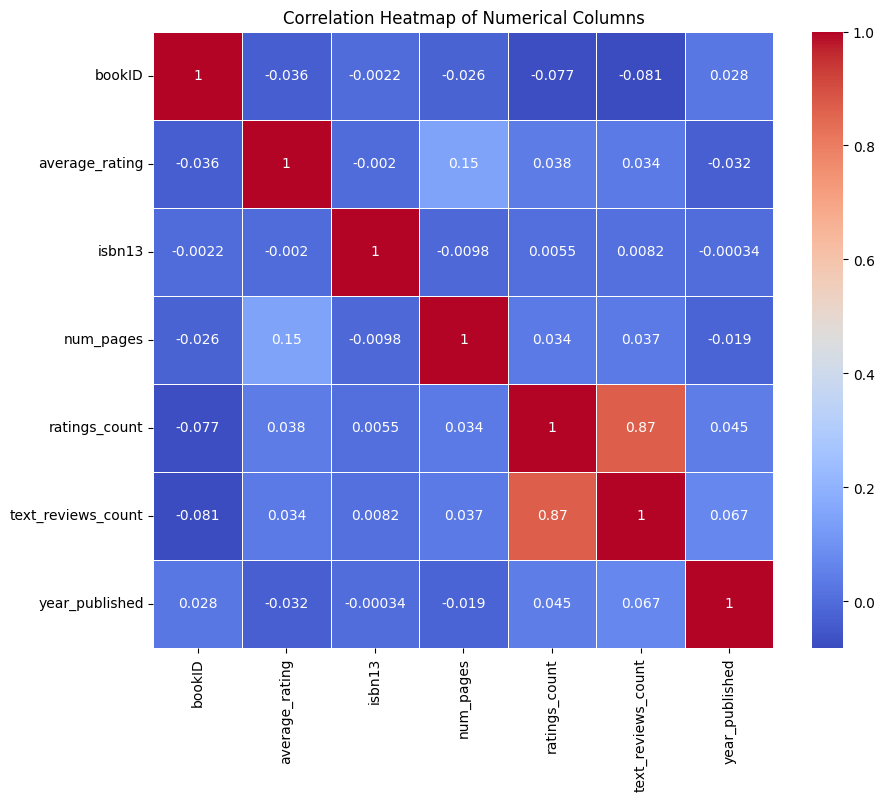

In [226]:
# Create a heat map showing the correlations between numerical columns.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded your dataset into a DataFrame called 'df'
# If not, you can load it using: df = pd.read_csv('your_dataset.csv')

# Select the numerical columns for correlation
numerical_columns = data.select_dtypes(include=['int64', 'float64'])
print("Numerical columns :", list(numerical_columns.columns))

# Compute the correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()


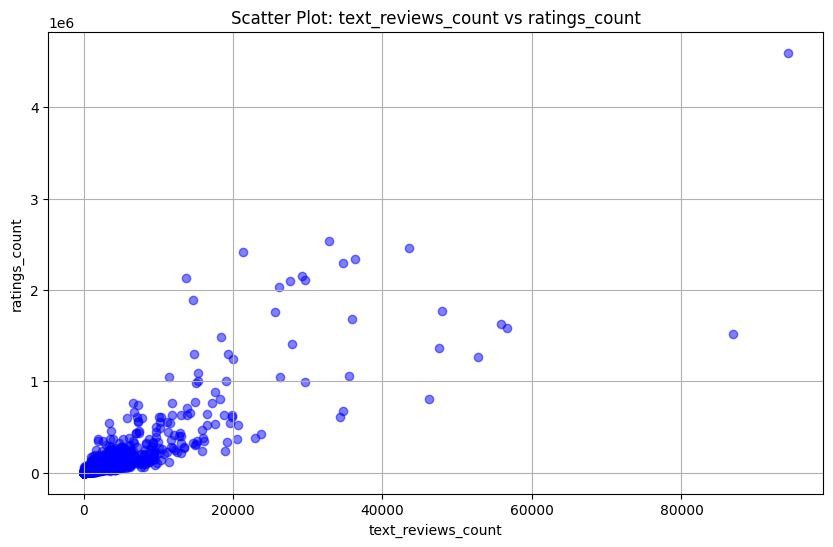

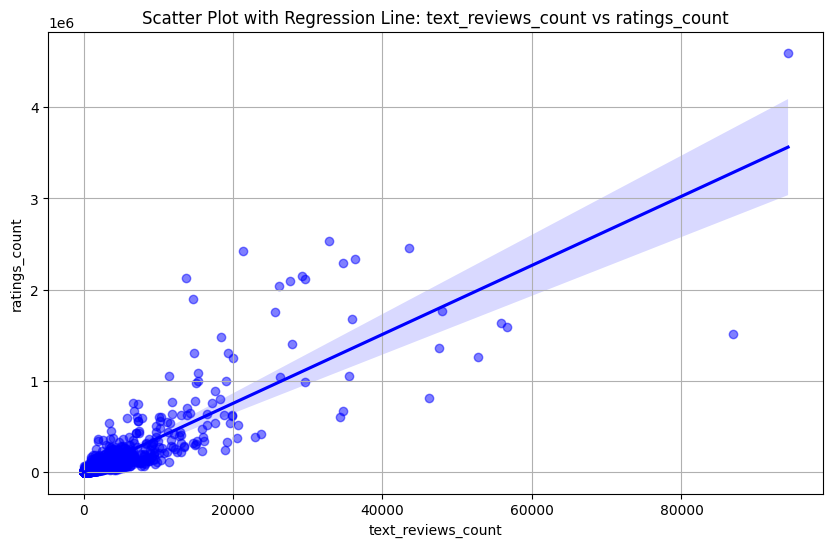

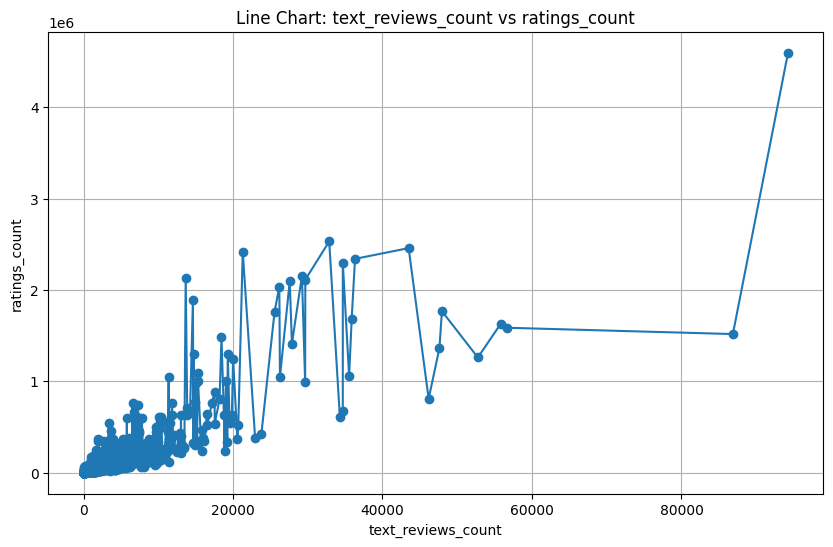

In [227]:
import matplotlib.pyplot as plt

# Assuming you have your data loaded into a DataFrame called 'data'

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data["text_reviews_count"], data["ratings_count"], alpha=0.5, color='b')
plt.title('Scatter Plot: text_reviews_count vs ratings_count')
plt.xlabel('text_reviews_count')
plt.ylabel('ratings_count')
plt.grid(True)
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your data loaded into a DataFrame called 'data'

# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x=data["text_reviews_count"], y=data["ratings_count"], scatter_kws={'alpha':0.5}, color='b')
plt.title('Scatter Plot with Regression Line: text_reviews_count vs ratings_count')
plt.xlabel('text_reviews_count')
plt.ylabel('ratings_count')
plt.grid(True)
plt.show()


# Create a line chart (line plot)
plt.figure(figsize=(10, 6))
data_sorted = data.sort_values(by="text_reviews_count")
plt.plot(data_sorted["text_reviews_count"], data_sorted["ratings_count"], marker='o', linestyle='-')
plt.title('Line Chart: text_reviews_count vs ratings_count')
plt.xlabel('text_reviews_count')
plt.ylabel('ratings_count')
plt.grid(True)
plt.show()


In [228]:
data.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher', 'year_published'],
      dtype='object')

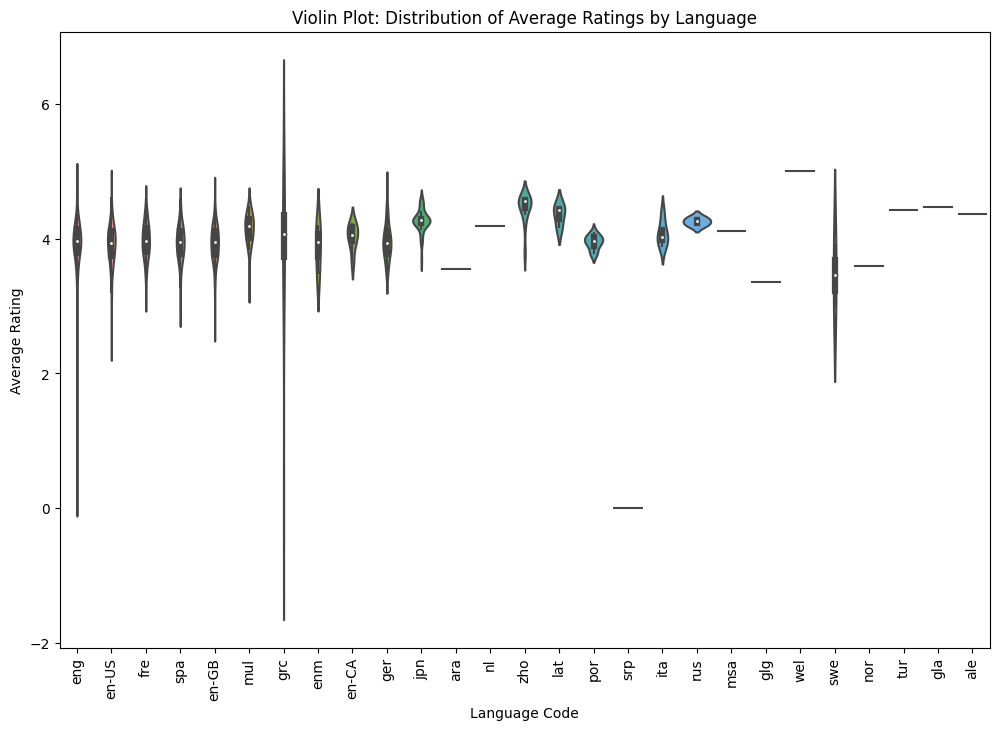

In [229]:
# Visualize the distribution of average ratings for different languages using a violin plot.


import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your data loaded into a DataFrame called 'data'

# Create a violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x=data["language_code"], y=data["average_rating"])
plt.title('Violin Plot: Distribution of Average Ratings by Language')
plt.xlabel('Language Code')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()


In [230]:
data.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher', 'year_published'],
      dtype='object')

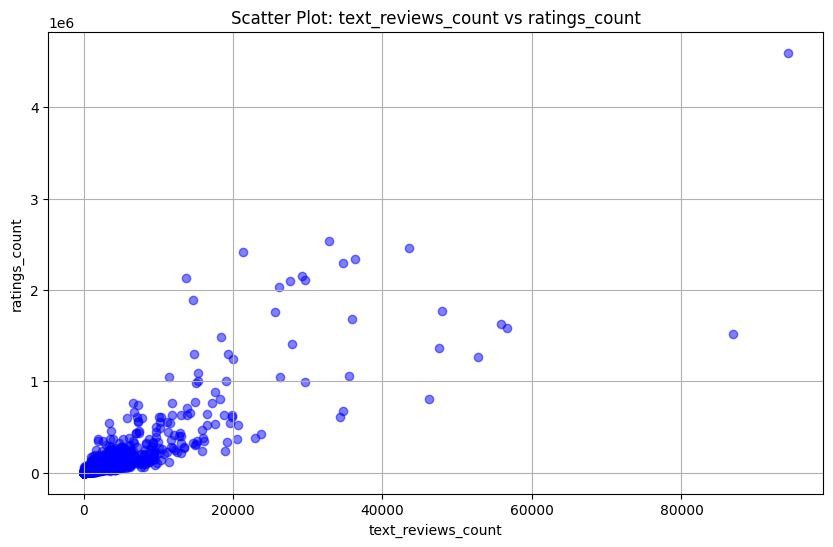

In [231]:
# Plot a scatter plot of the number of text reviews vs. ratings for each book.
import matplotlib.pyplot as plt

# Assuming you have your data loaded into a DataFrame called 'data'

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data["text_reviews_count"], data["ratings_count"], alpha=0.5, color='b')
plt.title('Scatter Plot: text_reviews_count vs ratings_count')
plt.xlabel('text_reviews_count')
plt.ylabel('ratings_count')
plt.grid(True)
plt.show()

In [232]:
data.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year_published
0,1,Harry Potter and the Half-Blood Prince (Harry ...,"[J.K. Rowling, Mary GrandPré]",4.57,0439785960,9780439785969,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,2006.0
1,2,Harry Potter and the Order of the Phoenix (Har...,"[J.K. Rowling, Mary GrandPré]",4.49,0439358078,9780439358071,eng,870,2153167,29221,2004-09-01,Scholastic Inc.,2004.0
2,4,Harry Potter and the Chamber of Secrets (Harry...,[J.K. Rowling],4.42,0439554896,9780439554893,eng,352,6333,244,2003-11-01,Scholastic,2003.0
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,"[J.K. Rowling, Mary GrandPré]",4.56,043965548X,9780439655484,eng,435,2339585,36325,2004-05-01,Scholastic Inc.,2004.0
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,"[J.K. Rowling, Mary GrandPré]",4.78,0439682584,9780439682589,eng,2690,41428,164,2004-09-13,Scholastic,2004.0


In [233]:
 #First, #let's group the data by year and author, and count the number of books each author published each year.

data["main_author"] = data["authors"].apply(lambda x:x[0])
author_year_counts = data.groupby(['year_published', 'main_author'])['bookID'].count().reset_index()


top_10_authors_by_year = author_year_counts.groupby('year_published').apply(lambda x: x.nlargest(4, 'bookID')).reset_index(drop=True)
top_10_authors_by_year

,year_published,main_author,bookID
0,1900.0,Iain Crichton Smith,1
1,1913.0,Marcus Tullius Cicero,1
2,1914.0,Tacitus,1
3,1919.0,Thucydides,1
4,1921.0,Apollodorus,1
...,...,...,...
283,2019.0,Alden T. Vaughan,1
284,2019.0,Bill Brittain,1
285,2019.0,David West,1
286,2019.0,Erich Fromm,1


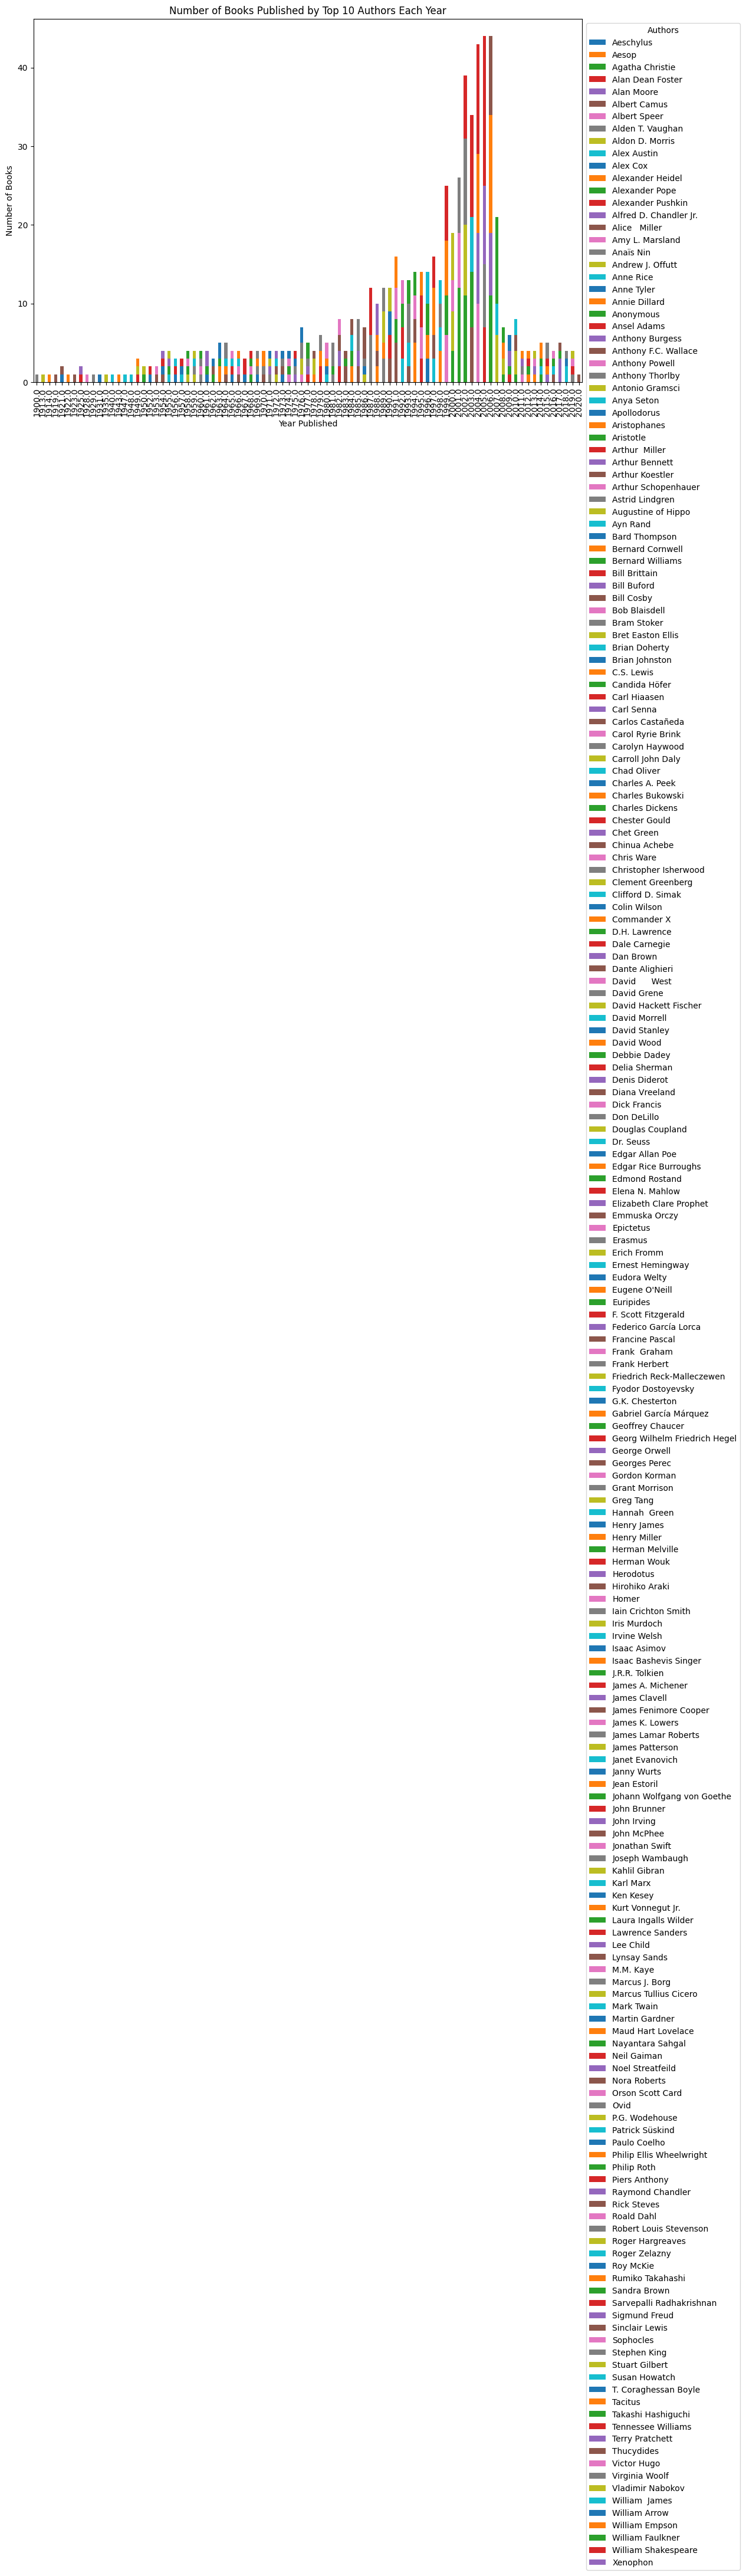

In [234]:
# Create a stacked bar chart showing the number of books published by the top 4 authors each year.
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have your dataset in a DataFrame called 'df'

# First, let's group the data by year and author, and count the number of books each author published each year.
author_year_counts = data.groupby(['year_published', 'main_author'])['bookID'].count().reset_index()

# Now, let's find the top 10 authors for each year.
top_10_authors_by_year = author_year_counts.groupby('year_published').apply(lambda x: x.nlargest(4, 'bookID')).reset_index(drop=True)

# Pivot the table to make it suitable for a stacked bar chart.
pivot_table = top_10_authors_by_year.pivot(index='year_published', columns='main_author', values='bookID').fillna(0)

# Create the stacked bar chart.
ax = pivot_table.plot(kind='bar', stacked=True, figsize=(12, 8))

# Set labels and title
plt.xlabel('Year Published')
plt.ylabel('Number of Books')
plt.title('Number of Books Published by Top 10 Authors Each Year')

# Show the legend
plt.legend(title='Authors', bbox_to_anchor=(1, 1), loc='upper left')

plt.show()



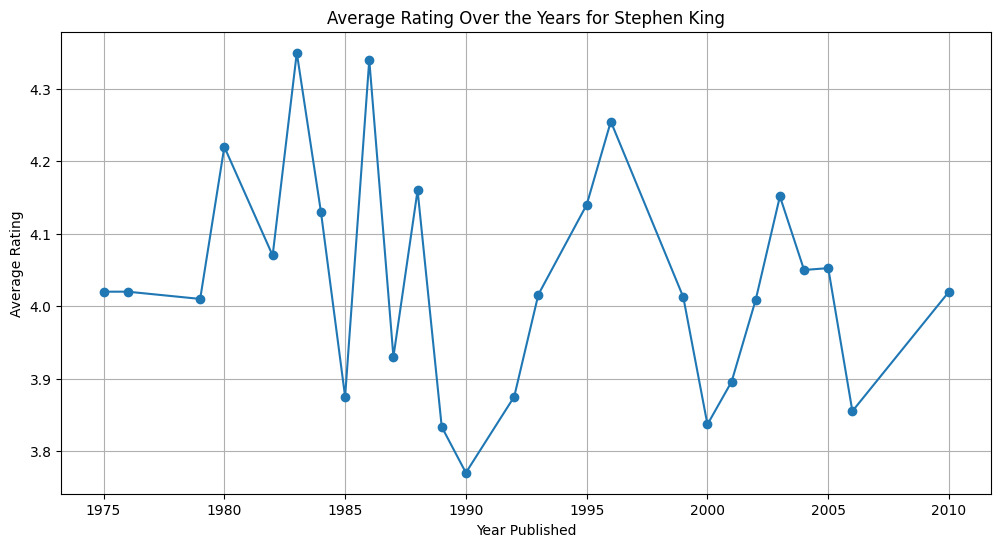

In [235]:
# Generate a time series plot of the average rating over the years for a specific author.

specific_author = "Stephen King"

# Filter the data for the specific author
author_data  = data[data["main_author"] == specific_author]

# Group the data by the publication year and calculate the average rating for each year.
average_rating_by_year = author_data.groupby('year_published')['average_rating'].mean()

# Create a time series plot
plt.figure(figsize=(12, 6))
plt.plot(average_rating_by_year.index, average_rating_by_year.values, marker='o', linestyle='-')
plt.xlabel('Year Published')
plt.ylabel('Average Rating')
plt.title(f'Average Rating Over the Years for {specific_author}')
plt.grid(True)

plt.show()

**Geospatial Analysis:**

In [236]:
# Can you visualize the distribution of books by author's home country on a map?

language_codes_to_countries = {
   'eng': 'England',
    'en-US': 'United States',
    'fre': 'France',
    'spa': 'Spain',
    'en-GB': 'United Kingdom',
    'mul': 'Multiple Languages',
    'grc': 'Greece',
    'enm': 'Middle English',
    'en-CA': 'Canada',
    'ger': 'Germany',
    'jpn': 'Japan',
    'ara': 'Arabic',
    'nl': 'Netherlands',
    'zho': 'China',
    'lat': 'Latin',
    'por': 'Portugal',
    'srp': 'Serbia',
    'ita': 'Italy',
    'rus': 'Russia',
    'msa': 'Malaysia',
    'glg': 'Galician',
    'wel': 'Wales',
    'swe': 'Sweden',
    'nor': 'Norway',
    'tur': 'Turkey',
    'gla': 'Gaelic',
    'ale': 'Aleut'
}

def get_country(code):
    return language_codes_to_countries[code]

# To access the country for a specific language code:
# country = language_codes_to_countries['eng']
data["countries"] = data["language_code"].apply(get_country)
data["main_author"] = data["authors"].apply(lambda x : x[0])




In [237]:
# import folium
# from geopy.geocoders import Nominatim

# # Assuming you have a DataFrame named 'data' with 'countries' and 'main_author' columns
# # Load your data into 'data' DataFrame

# # Create a map centered at a specific location (e.g., the world)
# m = folium.Map(location=[0, 0], zoom_start=2)

# # Create a geocoder object to obtain country coordinates
# geolocator = Nominatim(user_agent="book_distribution")

# # Loop through your DataFrame and add markers for each author's home country
# for index, row in data.iterrows():
#     country_name = row['countries']
#     main_author = row['main_author']
    
#     # Use the geolocator to get the coordinates of the country
#     location = geolocator.geocode(country_name)
    
#     if location:
#         lat, lon = location.latitude, location.longitude
#         folium.Marker([lat, lon], popup=f"{main_author}, {country_name}").add_to(m)

# # Display the map in your Jupyter notebook
# m


In [238]:
# import folium
# from geopy.geocoders import Nominatim
# from geopy.extra.rate_limiter import RateLimiter

# # Assuming you have a DataFrame named 'data' with 'countries' and 'main_author' columns
# # Load your data into 'data' DataFrame

# # Create a map centered at a specific location (e.g., the world)
# m = folium.Map(location=[0, 0], zoom_start=2)

# # Create a geocoder object with rate limiting
# geolocator = Nominatim(user_agent="book_distribution")
# geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# # Create a cache to store geocoding results
# geocoding_cache = {}

# # Loop through your DataFrame and add markers for each author's home country
# for index, row in data.iterrows():
#     country_name = row['countries']
#     main_author = row['main_author']
    
#     # Check if the country has been geocoded before
#     if country_name in geocoding_cache:
#         location = geocoding_cache[country_name]
#     else:
#         location = geocode(country_name)
#         geocoding_cache[country_name] = location
    
#     if location:
#         lat, lon = location.latitude, location.longitude
#         folium.Marker([lat, lon], popup=f"{main_author}, {country_name}").add_to(m)

# # Display the map in your Jupyter notebook
# m



In [239]:
# Are there any geographic clusters of popular authors or publishers?

**NLP and Text Analysis:**

In [240]:
# Analyze book titles to identify common keywords or themes.
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

# Assuming you have a DataFrame named 'data' with a 'title' column
# Load your data into 'data' DataFrame

# Download the NLTK stopwords dataset (if not already downloaded)
nltk.download('stopwords')

# Tokenize and preprocess book titles
def process_title(title):
    # Tokenize the title into words
    words = word_tokenize(title)
    
    # Convert words to lowercase
    words = [word.lower() for word in words]
    
    # Remove stopwords and single-character words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words and len(word) > 1]
    
    return words

# Apply the title processing function to the DataFrame
data['title_words'] = data['title'].apply(process_title)

# Concatenate the processed title words into a single list
all_title_words = [word for title_words in data['title_words'] for word in title_words]

# Count the frequency of each word in the titles
word_counts = Counter(all_title_words)

# Print the most common keywords or themes
most_common_keywords = word_counts.most_common(10)  # You can change the number (10) as needed
print("Most Common Keywords or Themes:")
for keyword, count in most_common_keywords:
    print(f"{keyword}: {count}")


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Most Common Keywords or Themes:
's: 1152
life: 263
stories: 240
world: 218
vol: 216
guide: 208
history: 189
book: 166
love: 164
volume: 161


In [241]:
# Perform sentiment analysis on text reviews to identify positive and negative sentiments.
import pandas as pd
from textblob import TextBlob

# Assuming you have a DataFrame named 'data' with a 'title' column
# Load your data into 'data' DataFrame

# Create a new column 'sentiment' to store sentiment values
data['sentiment'] = data['title'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Define a function to classify sentiment
def classify_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the sentiment classification function
data['sentiment'] = data['sentiment'].apply(classify_sentiment)

# Display the DataFrame with sentiment values
print(data[['title', 'sentiment']])


                                                   title sentiment
0      Harry Potter and the Half-Blood Prince (Harry ...   Neutral
1      Harry Potter and the Order of the Phoenix (Har...   Neutral
2      Harry Potter and the Chamber of Secrets (Harry...   Neutral
3      Harry Potter and the Prisoner of Azkaban (Harr...   Neutral
4      Harry Potter Boxed Set  Books 1-5 (Harry Potte...   Neutral
...                                                  ...       ...
11118   Expelled from Eden: A William T. Vollmann Reader   Neutral
11119                        You Bright and Risen Angels  Positive
11120                    The Ice-Shirt (Seven Dreams #1)   Neutral
11121                                        Poor People  Negative
11122                        Las aventuras de Tom Sawyer   Neutral

[11123 rows x 2 columns]


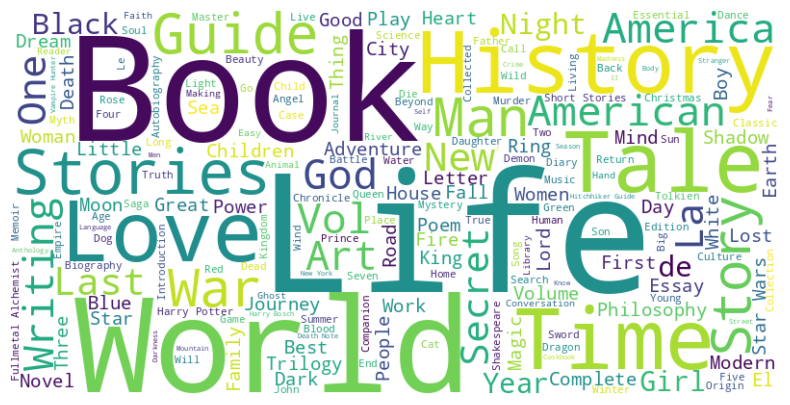

In [242]:

# Create a word cloud from book titles or authors' names.

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming you have a DataFrame named 'data' with a 'title' column
# Replace 'title' with the actual column name

# Concatenate all the titles into a single string
titles_text = ' '.join(data['title'].astype(str))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(titles_text)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


****

**Machine Learning and Predictive Analysis:**

In [243]:
data.shape

(11123, 17)

In [244]:
list(data.columns)

['bookID',
 'title',
 'authors',
 'average_rating',
 'isbn',
 'isbn13',
 'language_code',
 'num_pages',
 'ratings_count',
 'text_reviews_count',
 'publication_date',
 'publisher',
 'year_published',
 'main_author',
 'countries',
 'title_words',
 'sentiment']

In [263]:
data_for_ml = data.drop(columns=["title_words","authors","isbn","isbn13","bookID","title","sentiment","publication_date"])
data_for_ml.dtypes

average_rating        float64
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count      int64
publisher              object
year_published        float64
main_author            object
countries              object
dtype: object

In [264]:
data_for_ml.dtypes

average_rating        float64
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count      int64
publisher              object
year_published        float64
main_author            object
countries              object
dtype: object

In [265]:
data_for_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   average_rating      11123 non-null  float64
 1   language_code       11123 non-null  object 
 2   num_pages           11123 non-null  int64  
 3   ratings_count       11123 non-null  int64  
 4   text_reviews_count  11123 non-null  int64  
 5   publisher           11123 non-null  object 
 6   year_published      11121 non-null  float64
 7   main_author         11123 non-null  object 
 8   countries           11123 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 782.2+ KB


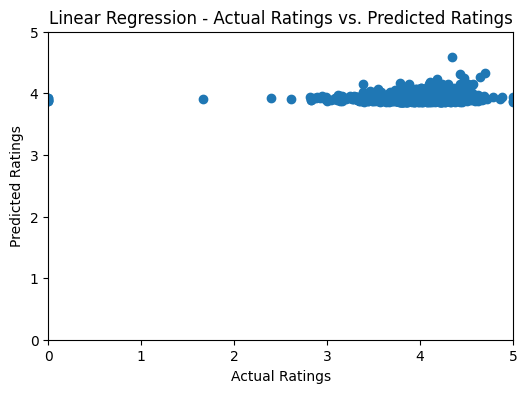

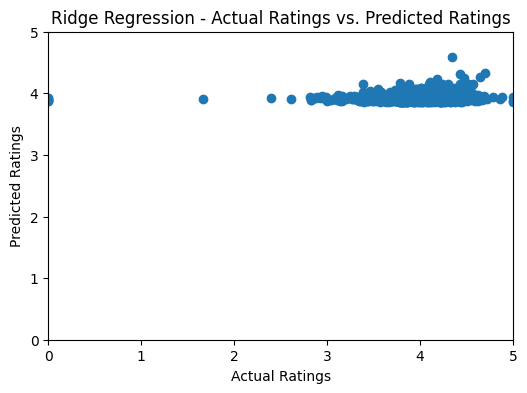

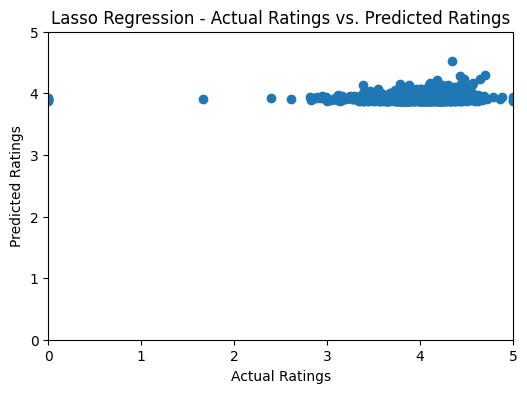

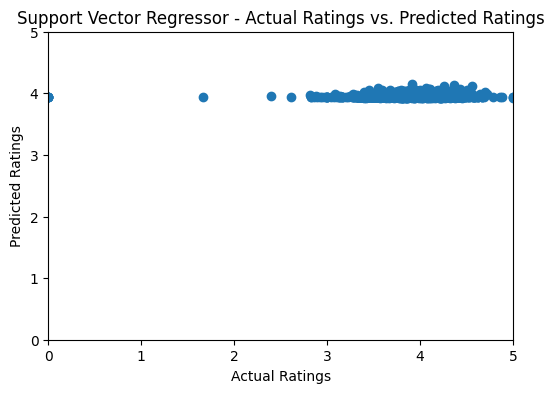

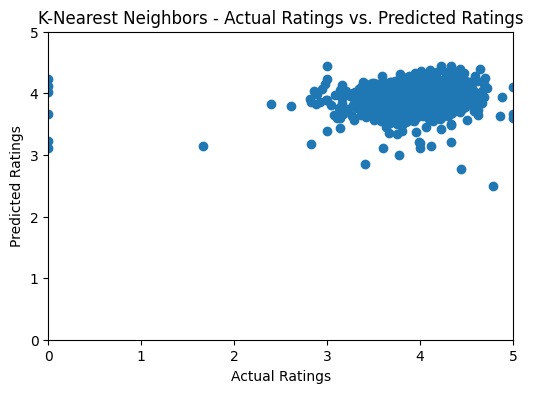

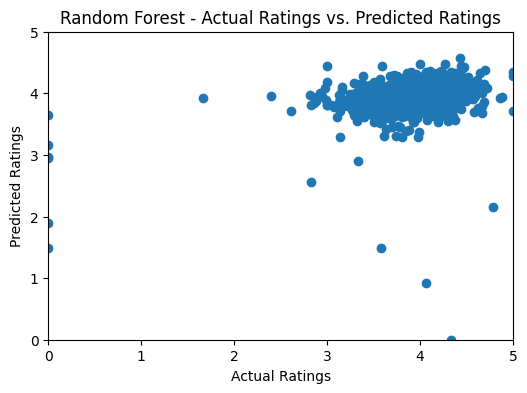

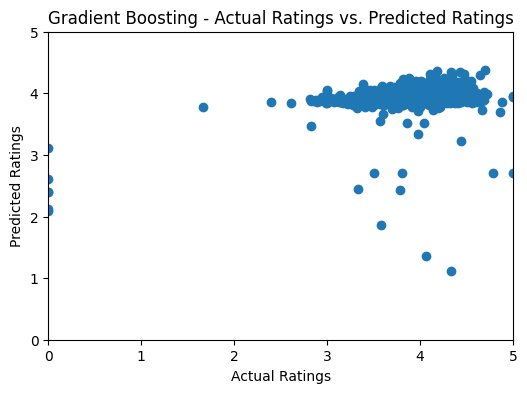

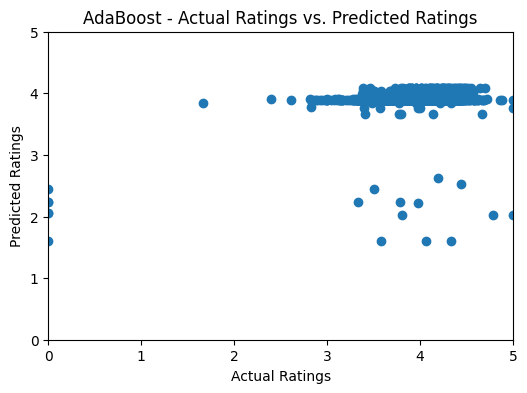

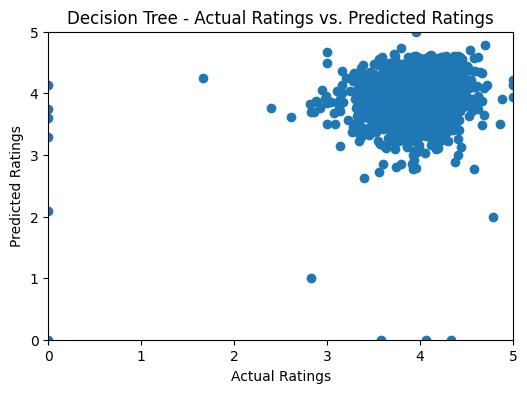

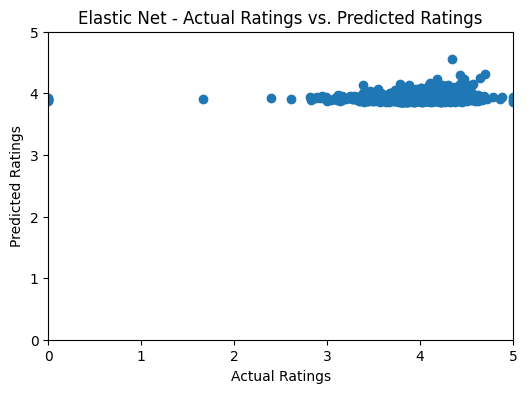

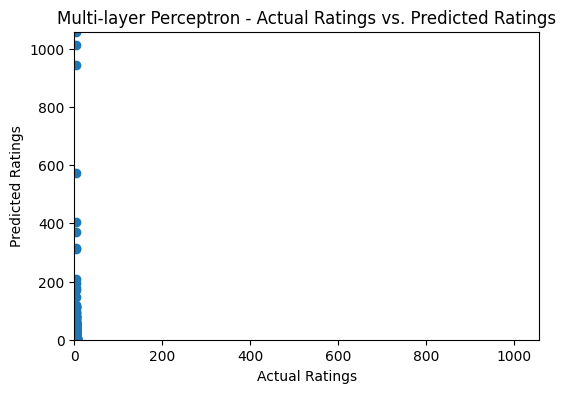

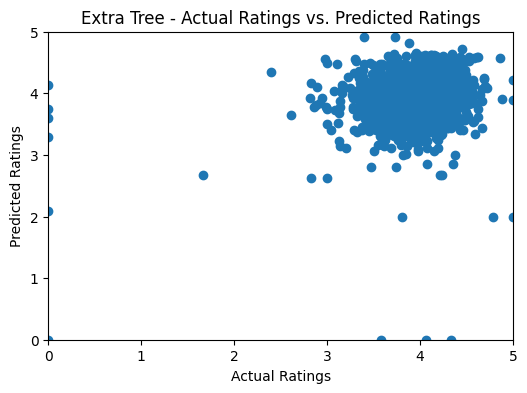

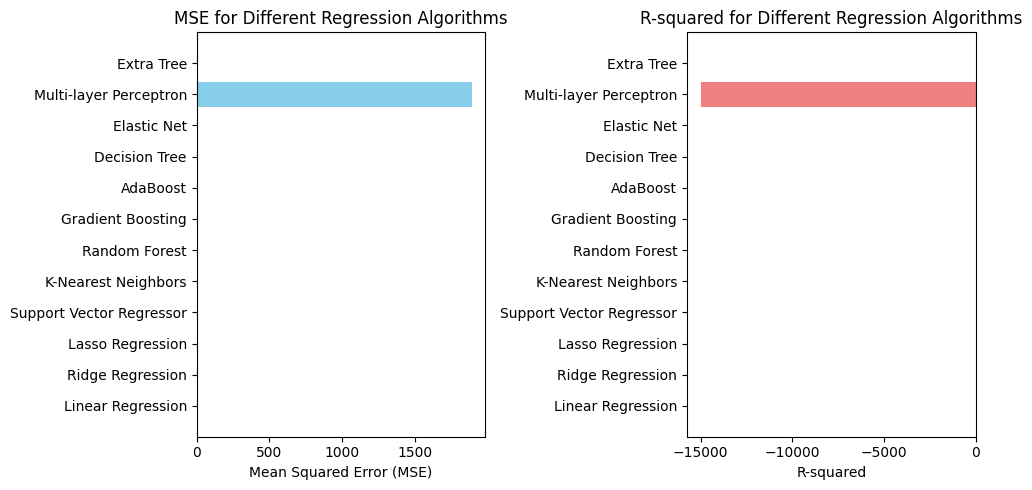

                   Algorithm          MSE     R-squared
0          Linear Regression     0.122877      0.026070
1           Ridge Regression     0.122877      0.026070
2           Lasso Regression     0.122925      0.025688
3   Support Vector Regressor     0.125019      0.009094
4        K-Nearest Neighbors     0.133562     -0.058620
5              Random Forest     0.122274      0.030849
6          Gradient Boosting     0.109125      0.135067
7                   AdaBoost     0.115777      0.082344
8              Decision Tree     0.199530     -0.581488
9                Elastic Net     0.122897      0.025909
10    Multi-layer Perceptron  1892.213305 -14996.809860
11                Extra Tree     0.203934     -0.616396


In [275]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import ElasticNet
from sklearn.neural_network import MLPRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load your dataset (Replace 'your_dataset.csv' with your dataset's file path)
df = data_for_ml  # Replace 'data_for_ml' with your dataset

# Data Preprocessing
selected_features = ['num_pages', 'ratings_count', 'text_reviews_count']
X = df[selected_features]
y = df['average_rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a dictionary to store regression algorithms
regressors = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Support Vector Regressor': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Elastic Net': ElasticNet(),
    'Multi-layer Perceptron': MLPRegressor(),
    'Extra Tree': ExtraTreeRegressor()
}




# Create a list of dictionaries to store the regression metrics and scatter plots
results = []

for name, regressor in regressors.items():
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({'Algorithm': name, 'MSE': mse, 'R-squared': r2})
    
    # Create a scatter plot for the current regression algorithm
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, y_pred)
    plt.xlim(0, max(max(y_test), max(y_pred)))  # Set the X-axis limit to start from 0
    plt.ylim(0, max(max(y_test), max(y_pred)))  # Set the Y-axis limit to start from 0
    plt.xlabel("Actual Ratings")
    plt.ylabel("Predicted Ratings")
    plt.title(f"{name} - Actual Ratings vs. Predicted Ratings")
    plt.show()

# Convert the list of dictionaries to a Pandas DataFrame
results_df = pd.DataFrame(results)

# Visualize the results
# Visualize the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.barh(results_df['Algorithm'], results_df['MSE'], color='skyblue')  # Use barh for horizontal bars
plt.xlabel('Mean Squared Error (MSE)')
plt.title('MSE for Different Regression Algorithms')

plt.subplot(1, 2, 2)
plt.barh(results_df['Algorithm'], results_df['R-squared'], color='lightcoral')  # Use barh for horizontal bars
plt.xlabel('R-squared')
plt.title('R-squared for Different Regression Algorithms')

plt.tight_layout()
plt.show()


print(results_df)


In [273]:
# What features are the most important predictors of a high average rating?




In [250]:
# Are there any trends in book popularity (ratings_count) that can be predicted over time?


In [251]:
# Can you predict the language of a book based on its title or author's name?

**Recommendation Systems:**

In [252]:
# Can you create a simple book recommendation system based on user reviews?
# Implement collaborative filtering to suggest books based on user preferences.
# Use content-based filtering to suggest books based on book features (e.g., author, language, publisher).

**Outlier Detection:**

In [253]:
# Identify books that are outliers in terms of ratings, reviews, or other features.
# Explore the reasons for outliers, such as unusually high ratings with few reviews.

**Data Cleaning and Preprocessing:**

In [254]:


# Are there any missing values in the dataset, and how should they be handled?
# Are there any duplicated rows in the dataset that need to be removed?